['서울', '경남', '울산', '경북', '부산', '경기', '인천', '충북', '강원', '충남', '대전', '세종시', '대구', '제주', '전북', '전남', '광주']
{'서울': 2329, '경남': 525, '울산': 144, '경북': 355, '부산': 710, '경기': 1957, '인천': 425, '충북': 209, '강원': 238, '충남': 251, '대전': 296, '세종시': 38, '대구': 497, '제주': 93, '전북': 300, '전남': 304, '광주': 415}
{'서울': 1332, '경남': 693, '울산': 193, '경북': 527, '부산': 551, '경기': 1870, '인천': 450, '충북': 347, '강원': 371, '충남': 353, '대전': 222, '세종시': 39, '대구': 474, '제주': 136, '전북': 436, '전남': 501, '광주': 413}


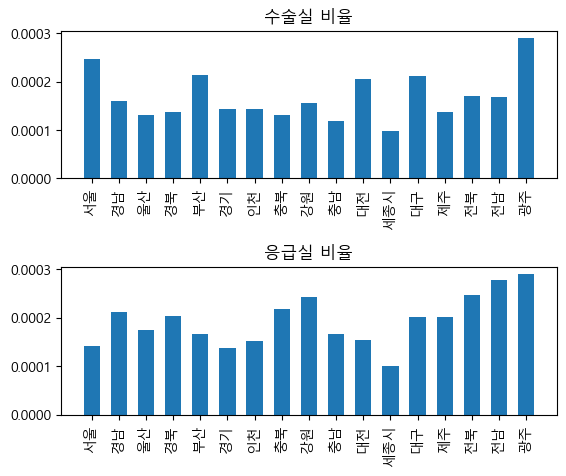

In [17]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# 수술실 22, 응급실 23

num_seoul = 9414093
num_kyungnam = 3263251
num_ulsan = 1106015
num_kyungbook = 2588860
num_busan = 3306993
num_gyungki = 13618969
num_incheon = 2978749
num_chungbuk =  1593931
num_gangwon = 1532617
num_chungnam = 2126374
num_daejeon =  1445126
num_sejong = 386126
num_daegu = 2356416
num_jeju = 676832
num_jeonbuk = 1762021
num_jeonnam = 1811554
num_gwangju = 1424818

def main():
    f = open('3.의료기관별상세정보서비스_01_시설정보의 복사본.csv','r')
    data = csv.reader(f)
    next(data)
    cities = []
    cnt_surgery = dict()
    cnt_emerg = dict()
    population = [num_seoul, num_kyungnam, num_ulsan, num_kyungbook, num_busan, num_gyungki, num_incheon,num_chungbuk, num_gangwon, num_chungnam, 
                  num_daejeon, num_sejong, num_daegu, num_jeju, num_jeonbuk, num_jeonnam, num_gwangju]
    for row in data:
        city = row[7]
        if city not in cities:
            cities.append(city)
            cnt_surgery[city] = int(row[22])
            cnt_emerg[city] = int(row[23])
        else:
            cnt_surgery[city] = cnt_surgery.get(city) + int(row[22])
            cnt_emerg[city] = cnt_emerg.get(city) + int(row[23])
    print(cities)
    print(cnt_surgery)
    print(cnt_emerg)

    cnt_surgery_list = list(cnt_surgery.values())
    cnt_emerg_list = list(cnt_emerg.values())

    surgery_ratio = []
    emerg_ratio = []
    
    for i in range(17):
        surgery_ratio.append(cnt_surgery_list[i] / population[i])
        emerg_ratio.append(cnt_emerg_list[i] / population[i])

    #한글 깨짐 해결
    matplotlib.rcParams['font.family'] ='Malgun Gothic'
    matplotlib.rcParams['axes.unicode_minus'] =False

    x = np.arange(17)
    plt.subplot(2,1,1)
    plt.bar(x, surgery_ratio, width=0.6)
    plt.title('수술실 비율')
    plt.xticks(x, cities, rotation=90)

    plt.subplot(2,1,2)
    plt.bar(x, emerg_ratio, width=0.6)
    plt.title('응급실 비율')
    plt.xticks(x, cities, rotation=90)

    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.6)
    
    plt.show()

if __name__=="__main__":
    main()

